# <u>About DataSet<u>


**Spotify transformed music listening forever when it launched in 2008.**\
**Discover, manage and share over 82 million tracks,including more than 4 million podcast titles, for free,**\
**or upgrade to Spotify Premium to access exclusive features for music including improved sound quality**\
**And an on-demand, offline, and ad-free music listening experience.**\
**Today, Spotify is the world’s most popular audio streaming subscription service with 422m users,**\
**including 182m subscribers, across 183 markets.**

Here we will analyze the spotify datasets which includes artists, 
song names, their popularity, their genre etc

# <u>Lets import the necessary libraries we will going to use<u>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [6]:
# now lets import our DataSets

spotfTracks = pd.read_csv("C:\\Users\\vidus\\OneDrive\\Desktop\\Spotify data analysis\\Spotify DataSets\\tracks.csv")
spotfFeat = pd.read_csv("C:\\Users\\vidus\\OneDrive\\Desktop\\Spotify data analysis\\Spotify DataSets\\SpotifyFeatures.csv")

***Spotify TRACKS DATA ANALYSIS***

In [7]:
# Lets look at the Tracks data and analyze it first

spotfTracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [8]:
# Lets look at the null values if present
pd.isnull(spotfTracks).sum()

# we could see only name column contains the null values 

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [9]:
# we will drop all null values

spotfTracks = spotfTracks.dropna()

In [10]:
# We will now look at the info about our dataset

spotfTracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

# Before moving forward ,
# lets make necessary changes in our DataSet

In order to better access the data we will set release_date as  index 

In [11]:
spotfTracks.set_index('release_date',inplace=True)
spotfTracks.index = pd.to_datetime(spotfTracks.index)
spotfTracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


We could see the duration of the song is given in miliseconds ,for better readibility we will convert it into minutes

In [12]:
spotfTracks['duration_min'] = spotfTracks['duration_ms'].apply(lambda x : round(x/60000))

# now we will drop the duration_ms column as well

spotfTracks.drop('duration_ms',inplace=True,axis=1)

In [13]:
spotfTracks.head()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,2
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,2
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,3
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,3


# Lets look at the staistical analysis of our data

In [14]:
spotfTracks.describe()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410,3.832547
std,18.369417,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112,2.128567
min,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000,3.000000
50%,27.000000,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000,4.000000
75%,41.000000,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000,4.000000
max,100.000000,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,94.000000


***As we could see from the above , Our popularity column ranges from 0 to 100***\
***We will now look at songs with least popularity***

In [15]:

sorted_pop_least = spotfTracks.sort_values(by = 'popularity',ascending= True)
sorted_pop_least.loc[ : , ['name','popularity']].head(10)

,name,popularity
release_date,,
1934-01-01,You and the night and the music,0
1923-01-01,Roses of Picardy,0
1923-01-01,I'm the last of the red hot mamas,0
1923-01-01,Snakes hips,0
1923-01-01,The man I love,0
1923-01-01,I'll Have Vanilla,0
1923-01-01,Little Curly Hair In a High Chair,0
1923-01-01,The Grass Grows Greener,0
1923-01-01,Savannah,0


***we will look at the songs with max popularity***

In [16]:
sorted_pop_max = spotfTracks.sort_values(by = 'popularity',ascending= False)
max_pop = sorted_pop_max.loc[ : , ['name','artists','popularity']].head(10)
max_pop



,name,artists,popularity
release_date,,,
2021-03-19,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100
2021-01-08,drivers license,['Olivia Rodrigo'],99
2021-01-06,Astronaut In The Ocean,['Masked Wolf'],98
2020-12-04,telepatía,['Kali Uchis'],97
2020-03-20,Save Your Tears,['The Weeknd'],97
2021-03-05,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96
2020-03-20,Blinding Lights,['The Weeknd'],96
2020-09-16,The Business,['Tiësto'],95
2021-02-04,Fiel,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",94


# we could see [Peaches] by ['Justin Bieber', 'Daniel Caesar', 'Giveon'] is at the top of maximum popularity

 Lets be more clear with the help of visuals

<AxesSubplot:xlabel='name'>

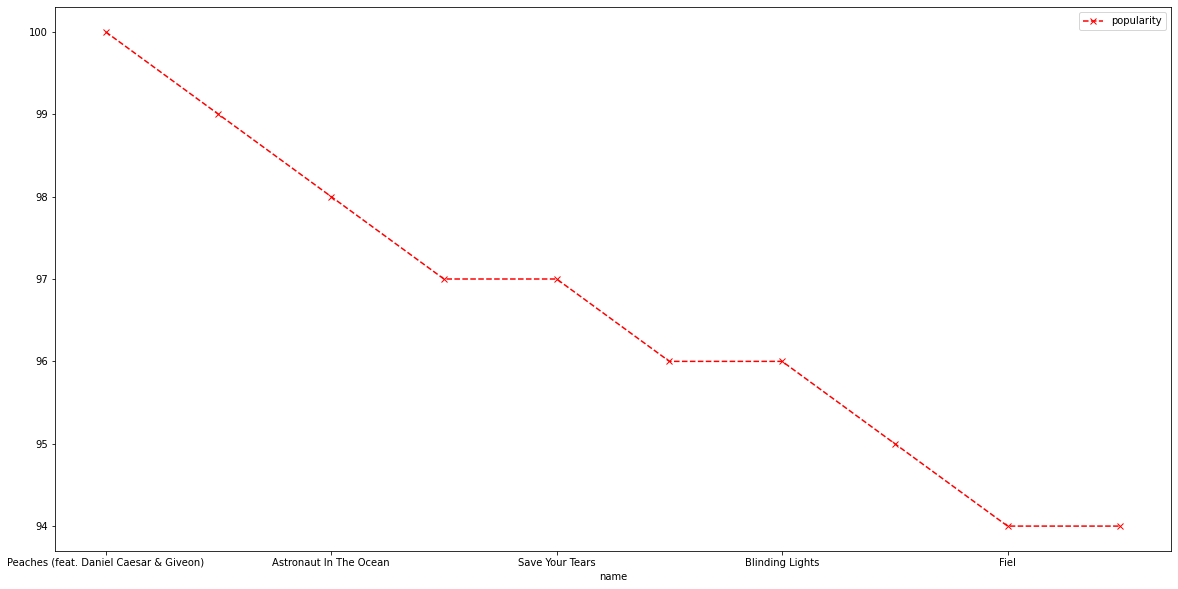

In [17]:
# px.histogram(spotfTracks.sort_values(by='popularity', ascending= False),x = "name",y = 'popularity')

max_pop.plot(kind = 'line',x = 'name',y = 'popularity',figsize = (20,10),style = 'x--', color = 'red')

# Lets create intresting playlists for users -> spotify analysis 2